# Read data from .txt

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [13]:
# set fixed size for plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [14]:
data = pd.read_csv('train2-2.txt',sep='|')
#test = pd.read_csv('test2.txt', sep='|')

In [15]:
df.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0


# Information about data
## Variables
    ID_Customer: Identificador de cliente.
    Cod_Prod: Código de la modalidad de producto contratado.
    Cod_Fecha: Fecha de contratación de la modalidad de producto.
    Socio_Demo_01-05: Variables socio demográficas relacionadas con el cliente.
    

#### 1. Socio_Demo_01.

    1: Edad < 18 años
    2: Edad >= 18 años y Edad < 30 años
    3: Edad >= 30 años y Edad < 45 años
    4: Edad >= 45 años y Edad < 65 años
    5: Edad >= 65 años
        

#### 2. Socio_Demo_02.
    1: Antigüedad < 1 año
    2: Antigüedad >=1 año y Antigüedad < 5 años
    3: Antigüedad >= 5 años y Antigüedad < 10 años
    4: Antigüedad >= 10 años y Antigüedad < 20 años
    5: Antigüedad >= 20 años

#### 3. Socio_Demo_03.
    1: Ingresos < 6.000 €
    2: Ingresos >= 6.000 € and Ingresos < 12.000 €
    3: Ingresos >= 12.000 € and Ingresos < 24.000 €
    4: Ingresos >= 24.000 € and Ingresos < 32.000 €
    5: Ingresos >= 32.000 €

#### 4. Cod_Prod.: Código de la modalidad de producto contratado.
#### 5. Socio_Demo_04: Sexo (1: Hombre, 2: Mujer)
#### 6. Socio_Demo_05: Segmento (00: Particular | 01:Agricultor | 02:Comercio | 03:Autónomo)
#### 7. Cod_Fecha: Formato YYYY-MM

# Important phrases about data
    1. Train size > 3 million rows. Test size > 1 million rows.
    2. The clients in both files are different. Train > 1/2 million clients. Test > 1/4 million clients.
    3. There are almost 16% and 11% of clients with only one product in test and train, respectively.
    4. There are the same products in both files.
    5. Products are never repeated.
    6. Socio_Democrotic Values ARE ALWAYS CONSTANT on the user. Meaning they correspond to the time being (2017) and not when the prodcut was bought.

### Unique customers IDs for data and test

In [16]:
sortedData = data.ID_Customer.unique()
sortedData.sort()
sortedData[-10:]

array(['A0676361', 'A0676362', 'A0676363', 'A0676364', 'A0676365',
       'A0676366', 'A0676367', 'A0676368', 'A0676369', 'A0676370'], dtype=object)

In [17]:
sortedTest = test.ID_Customer.unique()
sortedTest.sort()
sortedTest[:10]

NameError: name 'test' is not defined

In [ ]:
data[data.ID_Customer=='A0451704']

In [ ]:
test[test.ID_Customer=='B0676372']

In [ ]:
test[test.ID_Customer=='B0676373']

## How many clients have only one product purchased?

### In test

In [ ]:
oneProdTest = test.groupby('ID_Customer')['Cod_Prod'].count()
print oneProdTest[oneProdTest==1].size, oneProdTest[oneProdTest==1].size/float(test.ID_Customer.unique().size)*100, '%'

### In train

In [ ]:
oneProdData = data.groupby('ID_Customer')['Cod_Prod'].count()
print oneProdData[oneProdData==1].size, oneProdData[oneProdData==1].size/float(data.ID_Customer.unique().size)*100, '%'

## Size of dataset

In [ ]:
data.shape

In [ ]:
test.shape

In [ ]:
#Number of clients
data.ID_Customer.unique().size

In [ ]:
test.ID_Customer.unique().size

### Number of products

In [ ]:
data.Cod_Prod.unique().size

In [ ]:
test.Cod_Prod.unique().size

#### There the same amount of prodcuts! Are they the same products?

In [ ]:
for product in test.Cod_Prod.unique():
    if product not in data.Cod_Prod.unique():
        print 'New product: ', product

#### Is there all type of features?

In [ ]:
print data.Socio_Demo_01.unique()
print data.Socio_Demo_02.unique()
print data.Socio_Demo_03.unique()
print data.Socio_Demo_04.unique()
print data.Socio_Demo_05.unique()

YES!

# Missing values?

In [ ]:
#Check if there is any NaN value in data
data.isnull().values.any()

In [ ]:
test.isnull().values.any()

#### The dataset is clean!

# Counting purchased products by different features

In [18]:
productsPerAge = data.groupby('Socio_Demo_01')['Cod_Prod'].count()
productsPerAntiq = data.groupby('Socio_Demo_02')['Cod_Prod'].count()
productsPerIncome = data.groupby('Socio_Demo_03')['Cod_Prod'].count()
productsPerGender = data.groupby('Socio_Demo_04')['Cod_Prod'].count()

In [19]:
productsPerAge

Socio_Demo_01
1      47430
2     282960
3    1077626
4    1355148
5     587437
Name: Cod_Prod, dtype: int64

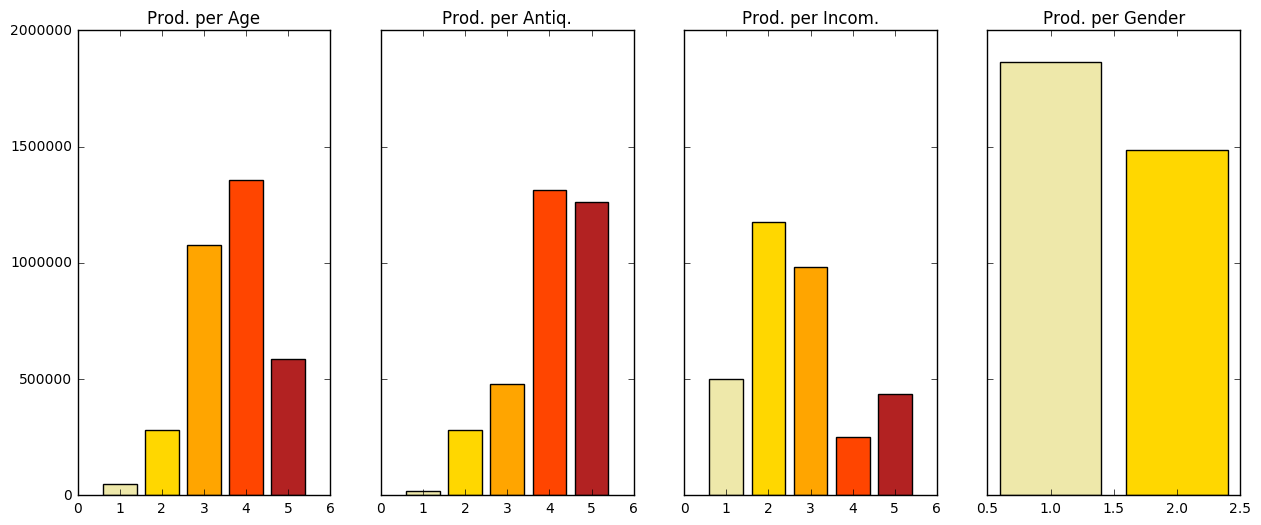

In [20]:
#Plottings
# Four subplots, sharing y axis
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
colors = ['#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
ax1.bar(-0.4+productsPerAge.index.values,productsPerAge.values, color=colors)
ax2.bar(-0.4+productsPerAntiq.index.values,productsPerAntiq.values, color=colors)
ax3.bar(-0.4+productsPerIncome.index.values,productsPerIncome.values, color=colors)
ax4.bar(-0.4+productsPerGender.index.values,productsPerGender.values, color=colors)
ax1.set_title('Prod. per Age')
ax2.set_title('Prod. per Antiq.')
ax3.set_title('Prod. per Incom.')
ax4.set_title('Prod. per Gender')

In [21]:
data[data.Cod_Prod==301].head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
8,A0000002,301,1995-03,5,5,1,1,0
10,A0000003,301,2012-05,5,5,5,2,0
16,A0000004,301,2008-10,5,5,3,1,0
18,A0000005,301,1984-04,5,5,3,1,0
20,A0000006,301,1996-10,5,5,3,1,0


In [22]:
givenProdPerAge = data[data.Cod_Prod==301].groupby('Socio_Demo_01').count()

In [23]:
givenProdPerAge.Cod_Prod

Socio_Demo_01
1       504
2     27528
3    121398
4    171156
5    105583
Name: Cod_Prod, dtype: int64

# Important things about visualization

## Plot products as a function of month and year of purchase

In [24]:
prodVsPeriod = data.groupby(['Cod_Prod','Cod_Fecha'])['Cod_Prod'].count()

In [25]:
prodVsPeriod.head(10)

Cod_Prod  Cod_Fecha
101       1989-11      1
          1992-05      2
          1995-03      1
          1996-01      1
          1996-05      1
          1996-06      1
          1996-08      5
          1996-11      9
          1996-12      1
          1997-05      1
Name: Cod_Prod, dtype: int64

In [26]:
prodVsPeriod.index.levels[1].astype((lambda x: dt.datetime.strftime(x,'%Y-%m'))

SyntaxError: unexpected EOF while parsing (<ipython-input-26-0b6d71a55f44>, line 1)

In [27]:
prodVsPeriod.index.levels[1].values

array(['1954-03', '1954-09', '1956-05', '1956-11', '1956-12', '1957-01',
       '1957-02', '1957-11', '1958-04', '1958-09', '1959-02', '1960-07',
       '1960-10', '1960-12', '1961-08', '1961-10', '1962-01', '1962-02',
       '1962-03', '1962-04', '1962-08', '1962-12', '1963-01', '1963-06',
       '1963-07', '1963-10', '1963-12', '1964-01', '1964-02', '1964-03',
       '1964-04', '1964-05', '1964-07', '1964-12', '1965-02', '1965-07',
       '1965-09', '1965-10', '1965-12', '1966-02', '1966-03', '1966-06',
       '1967-06', '1967-08', '1967-09', '1967-10', '1967-12', '1968-01',
       '1968-02', '1968-04', '1968-05', '1968-06', '1968-07', '1968-10',
       '1968-11', '1968-12', '1969-01', '1969-02', '1969-03', '1969-04',
       '1969-05', '1969-06', '1969-07', '1969-08', '1969-09', '1969-10',
       '1969-11', '1969-12', '1970-01', '1970-02', '1970-03', '1970-04',
       '1970-05', '1970-06', '1970-07', '1970-08', '1970-09', '1970-10',
       '1970-11', '1970-12', '1971-01', '1971-02', 

## Array with clients and products

In [28]:
colnames = data.Cod_Prod.unique()
colnames.sort()
rownames = data.ID_Customer.unique()
rownames.sort()
idVSProd = pd.DataFrame(data=np.zeros((data.ID_Customer.unique().size,data.Cod_Prod.unique().size)),columns=colnames,index=rownames,dtype=int)

In [29]:
idVSProd.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
idVSProd.loc[np.array(['A0451704','A0451708'])]

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0451704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0451708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
groupedData = data.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()

In [32]:
groupedTest = test.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()

NameError: name 'test' is not defined

In [ ]:
groupedData[groupedData>1]

In [ ]:
groupedTest[groupedTest>1]

# ···  *The clients do not repeat a product ever!* ···

In [ ]:
for product in colnames:
    columna = groupedData[:,product]
    idVSProd.loc[columna.index,product] = columna.values

In [ ]:
idVSProd.head(10)

In [ ]:
idVSProd.loc[idVSProd.loc[:,301].values > 0,301].head()

    Visualització, Producte vs Socio_demo

In [34]:
data.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0


In [35]:
#Creem DF per cada producte. 
df601=df[df['Cod_Prod']==601]

In [36]:
df601.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
5,A0000002,601,1998-06,5,5,1,1,0
9,A0000003,601,1985-11,5,5,5,2,0
14,A0000004,601,2008-05,5,5,3,1,0
19,A0000005,601,1984-04,5,5,3,1,0


In [38]:
df601.head() #Vemos que el producto se contrata mas de una vez en muchas ocasiones. Consideramos cada entrada como un 'cliente' distinto. La logica es que solo depende de las variables Socio_DEM, si cambiamos socio dem cambia la persona. 
print df601.size, df601['ID_Customer'].unique().size, 'ratio: ', df601['ID_Customer'].unique().size/float(df601.size)

5294048 661756 ratio:  0.125


In [53]:

data.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0


AttributeError: 'AxesSubplot' object has no attribute 'set_tittle'

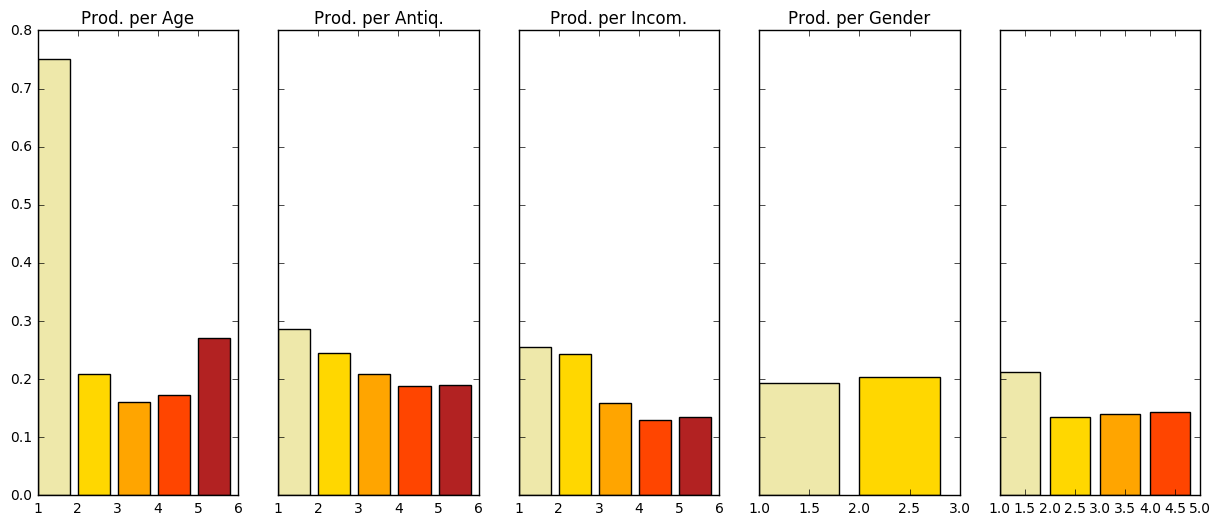

In [104]:
#Histogramas

#Numero de compras respecto a cada Socio_Demo.
Compras01=df601.groupby('Socio_Demo_01')['Cod_Prod'].count()
Compras02=df601.groupby('Socio_Demo_02')['Cod_Prod'].count()
Compras03=df601.groupby('Socio_Demo_03')['Cod_Prod'].count()
Compras04=df601.groupby('Socio_Demo_04')['Cod_Prod'].count()
Compras05=df601.groupby('Socio_Demo_05')['Cod_Prod'].count()

#Contamos numero de clientes en cada classe
Client_total_01=data.groupby('Socio_Demo_01').ID_Customer.count()
Client_total_02=data.groupby('Socio_Demo_02').ID_Customer.count()
Client_total_03=data.groupby('Socio_Demo_03').ID_Customer.count()
Client_total_04=data.groupby('Socio_Demo_04').ID_Customer.count()
Client_total_05=data.groupby('Socio_Demo_05').ID_Customer.count()

#Normalizamos.
Sells601=pd.DataFrame()
Sells601['Socio_Demo_01']=Compras01/Client_total_01
Sells601['Socio_Demo_02']=Compras02/Client_total_02
Sells601['Socio_Demo_03']=Compras03/Client_total_03
Sells601['Socio_Demo_04']=Compras04/Client_total_04
dummy=Compras05/Client_total_05
dummy.index=np.arange(4)+1 #Hay que cambiar los indices para que cuadre. Socio_Dem_04 las classes son 0,1,2,3
Sells601['Socio_Demo_05']=dummy

#Plottings
# Four subplots, sharing y axis
f, (bx1, bx2, bx3, bx4, bx5) = plt.subplots(1, 5, sharey=True)
colors = ['#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
bx1.bar(Sells601.index.values, Sells601.Socio_Demo_01, color=colors)
bx2.bar(Sells601.index.values, Sells601.Socio_Demo_02, color=colors)
bx3.bar(Sells601.index.values, Sells601.Socio_Demo_03, color=colors)
bx4.bar([1,2], Sells601.Socio_Demo_04[:2], color=colors)
bx5.bar([1,2,3,4], Sells601.Socio_Demo_05[:4], color=colors)
bx1.set_title('Prod. per Age')
bx2.set_title('Prod. per Antiq.')
bx3.set_title('Prod. per Incom.')
bx4.set_title('Prod. per Gender')
bx5.set_tittle('Prod. per Segment')

In [120]:
data.head()
df=data[data.Cod_Prod == 601]
df.head()


,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
5,A0000002,601,1998-06,5,5,1,1,0
9,A0000003,601,1985-11,5,5,5,2,0
14,A0000004,601,2008-05,5,5,3,1,0
19,A0000005,601,1984-04,5,5,3,1,0


In [140]:
#Funcion 

def product_rel(data, Cprod):
    df=data[data.Cod_Prod == Cprod]
#Create dataframe for porduct
#Numero de compras respecto a cada Socio_Demo.
    Compras01=df.groupby('Socio_Demo_01')['Cod_Prod'].count()
    Compras02=df.groupby('Socio_Demo_02')['Cod_Prod'].count()
    Compras03=df.groupby('Socio_Demo_03')['Cod_Prod'].count()
    Compras04=df.groupby('Socio_Demo_04')['Cod_Prod'].count()
    Compras05=df601.groupby('Socio_Demo_05')['Cod_Prod'].count()

#Contamos numero de clientes en cada classe
    Client_total_01=data.groupby('Socio_Demo_01').ID_Customer.count()
    Client_total_02=data.groupby('Socio_Demo_02').ID_Customer.count()
    Client_total_03=data.groupby('Socio_Demo_03').ID_Customer.count()
    Client_total_04=data.groupby('Socio_Demo_04').ID_Customer.count()
    Client_total_05=data.groupby('Socio_Demo_05').ID_Customer.count()

#Normalizamos.
    Sells=pd.DataFrame()
    
    Sells['Socio_Demo_01']=Compras01/Client_total_01
    Sells['Socio_Demo_02']=Compras02/Client_total_02
    Sells['Socio_Demo_03']=Compras03/Client_total_03
    Sells['Socio_Demo_04']=Compras04/Client_total_04
    dummy=Compras05/Client_total_05
    dummy.index=np.arange(4)+1 #Hay que cambiar los indices para que cuadre. Socio_Dem_04 las classes son 0,1,2,3
    Sells['Socio_Demo_05']=dummy
    
#Quitamos NaN values #ESTO ESTA MAL NO DEBERIA HABER NAN
    Sells.fillna(value=0, inplace='True')

    return Sells


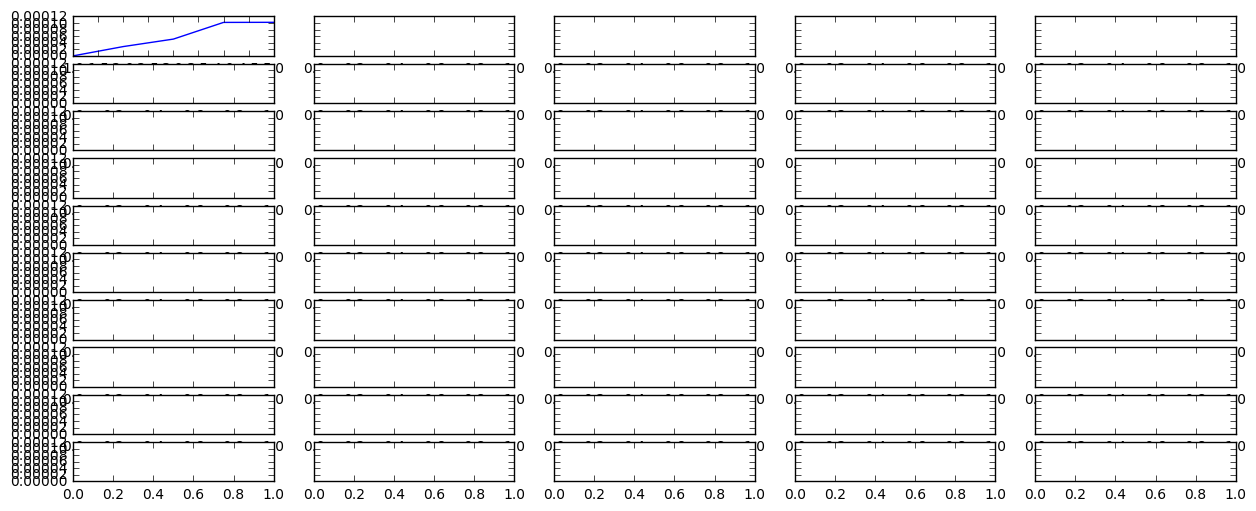

In [154]:
rows=10
cols=5
f, ax2= plt.subplots(rows, cols, sharex=False, sharey=True)
colors = ['#0000FF','#4682B4','#00FFFF','#008000','#9ACD32','#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
prodtucts=data.Cod_Prod.unique()
products.sort()
i=0
j=0
product = productes[10*i+j]
df=product_rel(data, product)
ax2[i,0].plot(df.index.values, df.Socio_Demo_01, color=colors[j], label=str(product))



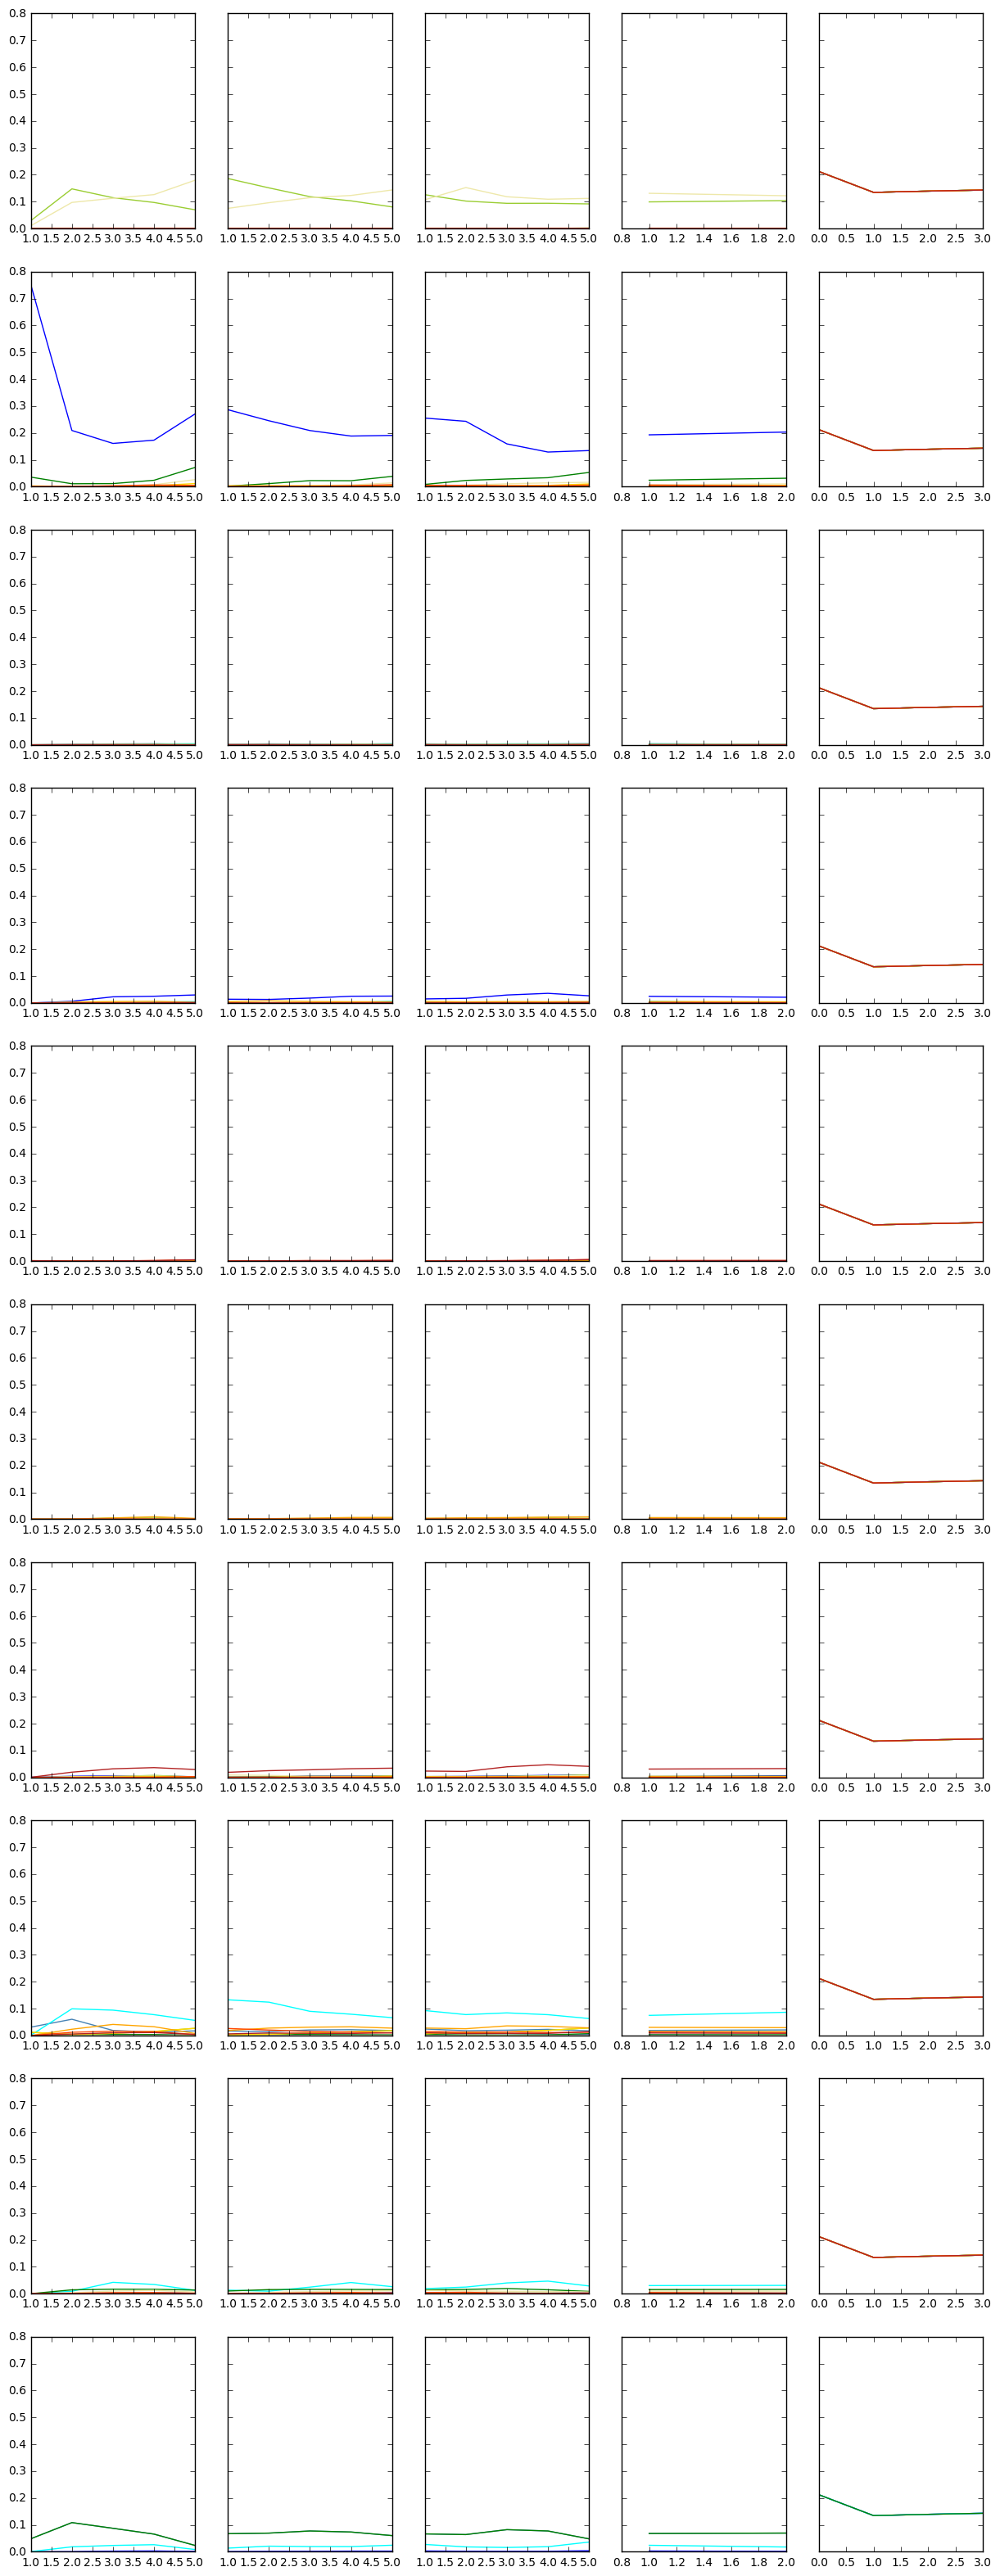

In [159]:
#Plots ##LO QUE TOCA
rcParams['figure.figsize'] = 15, 40
rows=10
cols=5
f, ax2= plt.subplots(rows, cols, sharex=False, sharey=True)
colors = ['#0000FF','#4682B4','#00FFFF','#008000','#9ACD32','#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
products=data.Cod_Prod.unique()
products.sort()

for i in range(0, products.size/10+1):
    for j in range(10):
        if 10*i+j < products.size:
            product = products[10*i+j]
            df=product_rel(data, product)
            ax2[i,0].plot(df.index.values, df.Socio_Demo_01, color=colors[j], label=str(product))
            ax2[i,1].plot(df.index.values, df.Socio_Demo_02, color=colors[j], label=str(product))
            ax2[i,2].plot(df.index.values, df.Socio_Demo_03, color=colors[j], label=str(product))
            ax2[i,3].plot([1,2], df.Socio_Demo_04[:2], color=colors[j], label=str(product))
            ax2[i,4].plot(range(4), df.Socio_Demo_05[:4], color=colors[j], label=str(product))
    #leyenda for k in range(5):
        #handles, labels = ax2[i,k].get_legend_handles_labels()
        #ax2[i,k].legend(handles,labels,loc='upper left')

1    0.212392
2    0.134665
3    0.139344
4    0.143341
dtype: float64